In [3]:
# libs
import numpy as np
import pandas as pd
import scipy.special
import scipy.stats as st

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline

# Ingest dataset

In [6]:
# file path
winequality_red = 'data/winequality-red.csv'
winequality_white = 'data/winequality-white.csv'

# read file
red = pd.read_csv(winequality_red, delimiter=';')
white = pd.read_csv(winequality_white, delimiter=';')


In [8]:
df = pd.concat([red,white])
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory Data Analysis

In [9]:
df.shape

(6497, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [11]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [13]:
result = st.describe(df, ddof=1, bias=False) 
result

DescribeResult(nobs=6497, minmax=(array([3.8    , 0.08   , 0.     , 0.6    , 0.009  , 1.     , 6.     ,
       0.98711, 2.72   , 0.22   , 8.     , 3.     ]), array([ 15.9    ,   1.58   ,   1.66   ,  65.8    ,   0.611  , 289.     ,
       440.     ,   1.03898,   4.01   ,   2.     ,  14.9    ,   9.     ])), mean=array([7.21530706e+00, 3.39666000e-01, 3.18633215e-01, 5.44323534e+00,
       5.60338618e-02, 3.05253194e+01, 1.15744574e+02, 9.94696634e-01,
       3.21850085e+00, 5.31268278e-01, 1.04918008e+01, 5.81837771e+00]), variance=array([1.68074049e+00, 2.71051686e-02, 2.11172819e-02, 2.26366965e+01,
       1.22735323e-03, 3.15041192e+02, 3.19472004e+03, 8.99203978e-06,
       2.58525244e-02, 2.21431880e-02, 1.42256132e+00, 7.62574769e-01]), skewness=array([ 1.72328965e+00,  1.49509654e+00,  4.71730672e-01,  1.43540426e+00,
        5.39982773e+00,  1.22006607e+00, -1.17747823e-03,  5.03601730e-01,
        3.86838798e-01,  1.79727000e+00,  5.65717729e-01,  1.89622693e-01]), kurtosis=arra

In [14]:
result.skewness

array([ 1.72328965e+00,  1.49509654e+00,  4.71730672e-01,  1.43540426e+00,
        5.39982773e+00,  1.22006607e+00, -1.17747823e-03,  5.03601730e-01,
        3.86838798e-01,  1.79727000e+00,  5.65717729e-01,  1.89622693e-01])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'fixed acidity'),
  Text(1.5, 0, 'volatile acidity'),
  Text(2.5, 0, 'citric acid'),
  Text(3.5, 0, 'residual sugar'),
  Text(4.5, 0, 'chlorides'),
  Text(5.5, 0, 'free sulfur dioxide'),
  Text(6.5, 0, 'total sulfur dioxide'),
  Text(7.5, 0, 'density'),
  Text(8.5, 0, 'pH'),
  Text(9.5, 0, 'sulphates'),
  Text(10.5, 0, 'alcohol'),
  Text(11.5, 0, 'quality')])

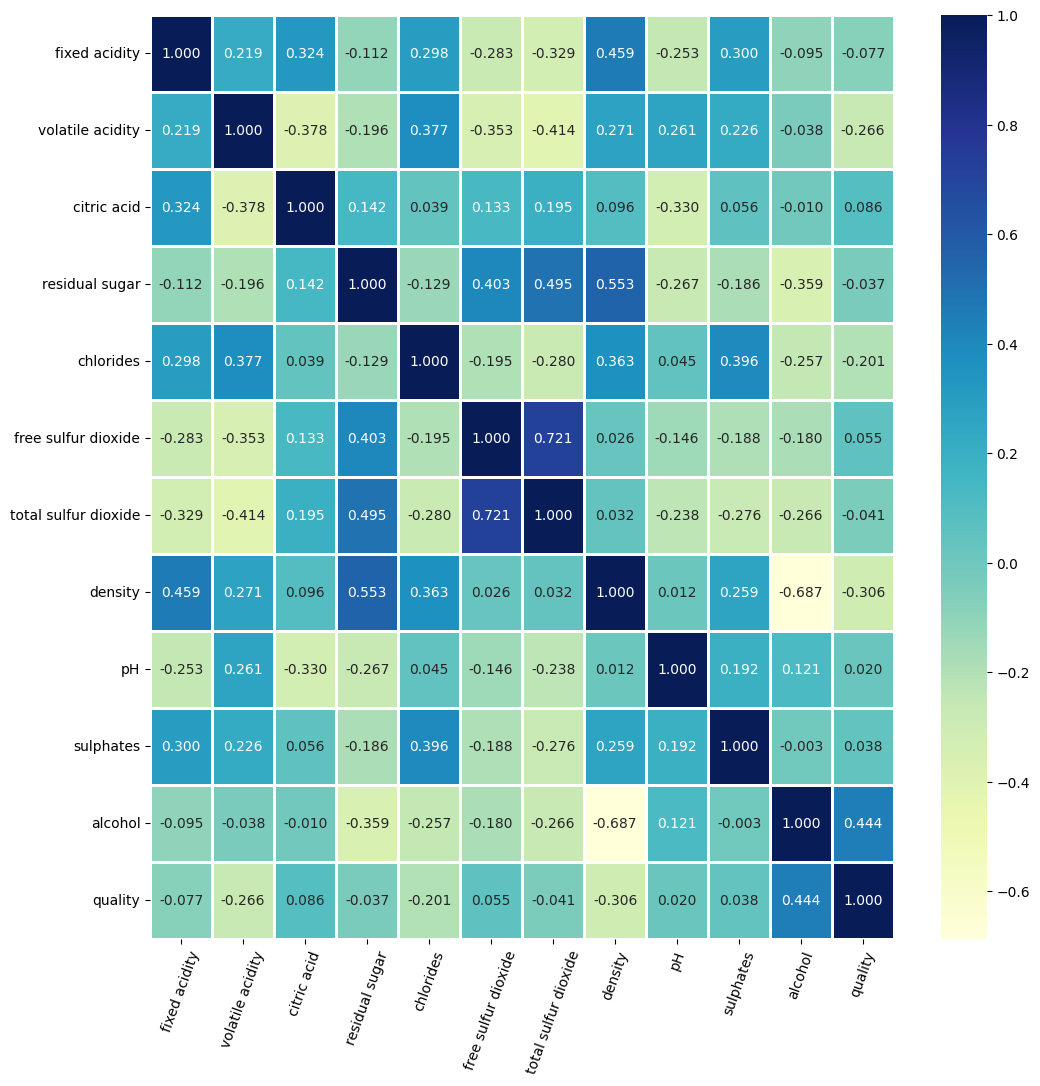

In [15]:
corr_df = df.corr()

# heatmaps
plt.figure(figsize=(12,12))
sns.heatmap(corr_df , cmap="YlGnBu", annot=True, fmt='.3f', linewidths=2)
plt.xticks(rotation=70)

# Main model

In [18]:
# libs
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
def forest_test(X, Y):
    X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
    # Time: Start
    start = time.process_time()
    model = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
    # Time: Stop
    print(time.process_time() - start)
    # predict
    predictM = model.predict(X_Test)
    print(confusion_matrix(Y_Test,predictM))
    print(classification_report(Y_Test,predictM))    

## Multi - Class classificaion
- Making multi - Class classificaion for the response variable.
- Dividing wine as poor, normal and excellent by giving the limit for the quality
- terciles: q=[0, 1/3, 2/3, 1] or q=3

In [21]:
group_names = ['poor', 'normal', 'excellent']
results, bin_edges = pd.qcut(df['quality'],
                            q=[0, 1/3, 2/3, 1],
                            labels=group_names,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, group_names),
                            columns=['Threshold', 'Gen_quality'])
results_table

,Threshold,Gen_quality
0,3.0,poor
1,5.0,normal
2,6.0,excellent


In [22]:
df_multi = df.copy()

df_multi['quality'] = results
df_multi['quality'].value_counts()

quality
normal       2836
poor         2384
excellent    1277
Name: count, dtype: int64

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/229725326.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='count', ylabel='quality'>

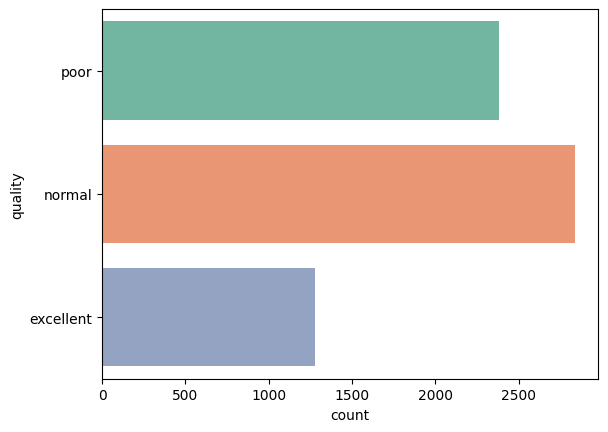

In [24]:
sns.countplot(df_multi['quality'], palette='Set2')

In [25]:
def convertQualityMulti(i):
    if i == 'poor':
        return 0
    elif i == 'normal':
        return 1
    elif i == 'excellent':
        return 2

In [26]:
df_multi['Mclass'] = df_multi['quality'].map(convertQualityMulti)

In [27]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x_multi = df_multi.loc[:, features].values 
y_multi = df_multi.loc[:,['Mclass']].values

# model that used all features
forest_test(x_multi, y_multi)

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



3.6915580000000006
[[520 188   6]
 [141 663  65]
 [  8 140 219]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.75       714
           1       0.67      0.76      0.71       869
           2       0.76      0.60      0.67       367

    accuracy                           0.72      1950
   macro avg       0.73      0.70      0.71      1950
weighted avg       0.72      0.72      0.72      1950



## Permutation feature important
- Logistic regression for feature importance

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Feature: 0, Score: 0.29697
Feature: 1, Score: 0.32349
Feature: 2, Score: -0.09782
Feature: 3, Score: -0.03318
Feature: 4, Score: 0.03679
Feature: 5, Score: -0.00968
Feature: 6, Score: 0.00604
Feature: 7, Score: 0.13206
Feature: 8, Score: 0.47552
Feature: 9, Score: 0.00867
Feature: 10, Score: -0.38630


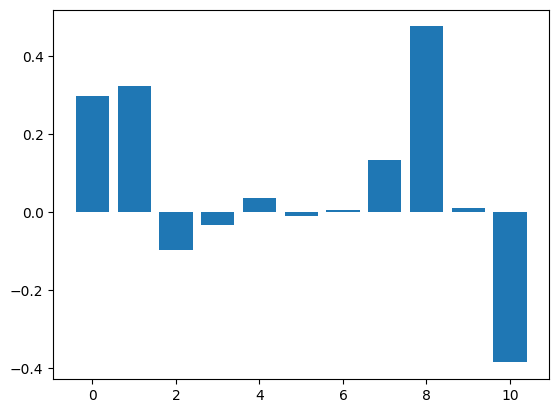

In [28]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# define the model
model_logis = LogisticRegression()
# fit the model
model_logis.fit(x_multi, y_multi)
# get importance
importance_logis = model_logis.coef_[0]
# summarize feature importance
for i,v in enumerate(importance_logis):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_logis))], importance_logis)
pyplot.show()

In [30]:
# selected features from logistic regression
dfs = df_multi[['fixed acidity', 'volatile acidity', 'pH', 'alcohol','quality','Mclass']]

features = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
x_dfs = dfs.loc[:, features].values 
y_dfs = dfs.loc[:,['Mclass']].values

forest_test(x_dfs, y_dfs)

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2.507480000000001
[[480 219  15]
 [163 587 119]
 [ 16 120 231]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       714
           1       0.63      0.68      0.65       869
           2       0.63      0.63      0.63       367

    accuracy                           0.67      1950
   macro avg       0.67      0.66      0.66      1950
weighted avg       0.67      0.67      0.67      1950



## Poor&Normal Vs Excellent

In [31]:
df_m1 = dfs.copy()

In [32]:
def convertQuality_lay1_1(i):
    if i == 'excellent':
        return 2
    elif i == 'poor' or i == 'normal':
        return 1

In [33]:
df_m1['M1_1'] = df_m1['quality'].map(convertQuality_lay1_1)
df_m1['M1_1'].value_counts()


M1_1
1    5220
2    1277
Name: count, dtype: int64

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/3863307268.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='M1_1', ylabel='count'>

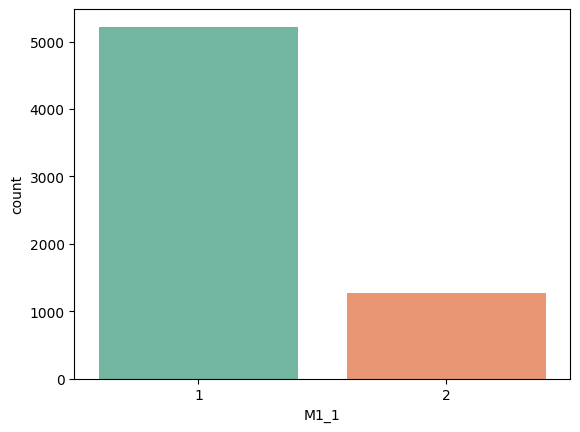

In [35]:
sns.countplot(x=df_m1['M1_1'], palette='Set2')

In [36]:
# selected
temp1 = df_m1[df_m1['M1_1']==1]
temp0 = df_m1[df_m1['M1_1']==2]

features = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
x_temp = temp1.loc[:, features].values 
y_temp = temp1.loc[:,['Mclass']].values

# split data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_temp, y_temp, test_size = 0.30, 
                                                    random_state = 101)

model = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
# predict
predictM = model.predict(x_temp)

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [37]:
temp1['M1_2'] = predictM
temp0['M1_2'] = temp0['M1_1'] 

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/4174489446.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/4174489446.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
temp0.shape, temp1.shape

((1277, 8), (5220, 8))

In [40]:
resultM1 = pd.concat([temp0,temp1])
resultM1.shape

(6497, 8)

In [42]:
resultM1['M1_2'].value_counts()

M1_2
1    2847
0    2373
2    1277
Name: count, dtype: int64

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/4133584445.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='M1_2', ylabel='count'>

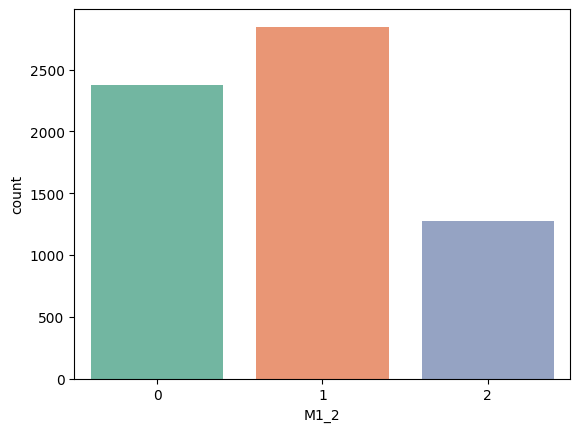

In [44]:
sns.countplot(x=resultM1['M1_2'], palette='Set2')

In [45]:
features = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
x_resultM1 = resultM1.loc[:, features].values 
y_resultM1 = resultM1.loc[:,['M1_2']].values

forest_test(x_resultM1, y_resultM1)

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2.382421000000001
[[539 129  15]
 [142 637  93]
 [ 22 164 209]]
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       683
           1       0.68      0.73      0.71       872
           2       0.66      0.53      0.59       395

    accuracy                           0.71      1950
   macro avg       0.70      0.68      0.69      1950
weighted avg       0.71      0.71      0.71      1950



## Poor&Excellent Vs Normal

In [46]:
df_m2 = dfs.copy()

In [47]:
def convertQuality_lay2_1(i):
    if i == 'excellent' or i == 'poor':
        return 0
    elif i == 'normal':
        return 1

In [48]:
df_m2['M2_1'] = df_m2['quality'].map(convertQuality_lay2_1)
df_m2['M2_1'].value_counts()

M2_1
0    3661
1    2836
Name: count, dtype: int64

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/3859759102.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='M2_1', ylabel='count'>

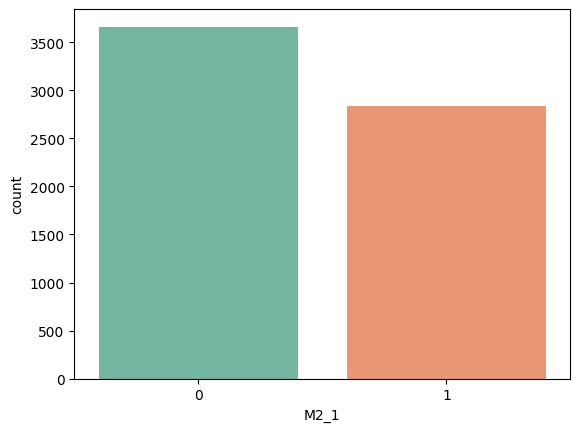

In [50]:
sns.countplot(x=df_m2['M2_1'], palette='Set2')

In [51]:
# selected
temp1 = df_m2[df_m2['M2_1']==1]
temp0 = df_m2[df_m2['M2_1']==0]

features = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
x_temp = temp0.loc[:, features].values 
y_temp = temp0.loc[:,['Mclass']].values

# split data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_temp, y_temp, test_size = 0.30, 
                                                    random_state = 101)

model = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
# predict
predictM = model.predict(x_temp)

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [52]:
temp0['M2_2'] = predictM
temp1['M2_2'] = temp1['M2_1'] 

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/3718914030.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/3718914030.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [53]:
temp0.shape, temp1.shape

((3661, 8), (2836, 8))

In [54]:
resultM2 = pd.concat([temp0,temp1])
resultM2.shape

(6497, 8)

In [55]:
resultM2['M2_2'].value_counts()

M2_2
1    2836
0    2370
2    1291
Name: count, dtype: int64

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/1007998116.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='M2_2', ylabel='count'>

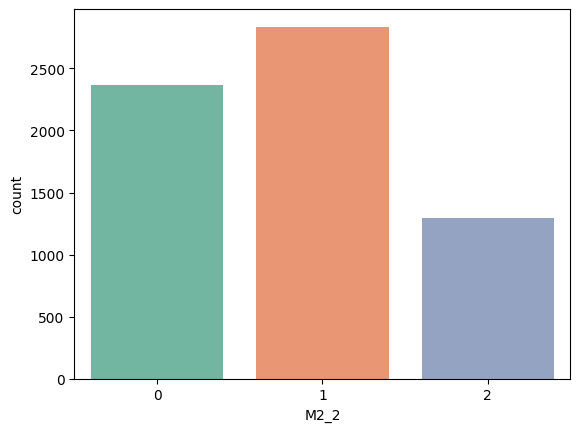

In [56]:
sns.countplot(x=resultM2['M2_2'], palette='Set2')

In [57]:
features = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
x_resultM2 = resultM2.loc[:, features].values 
y_resultM2 = resultM2.loc[:,['M2_2']].values

forest_test(x_resultM2, y_resultM2)

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2.458486999999998
[[513 203   9]
 [179 590  83]
 [ 10 143 220]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       725
           1       0.63      0.69      0.66       852
           2       0.71      0.59      0.64       373

    accuracy                           0.68      1950
   macro avg       0.69      0.66      0.67      1950
weighted avg       0.68      0.68      0.68      1950



## Normal&Excellent Vs Poor

In [65]:
df_m3 = dfs.copy()

In [66]:
def convertQuality_lay3_1(i):
    if i == 'excellent' or i == 'normal':
        return 1
    elif i == 'poor':
        return 0

In [67]:
df_m3['M3_1'] = df_m3['quality'].map(convertQuality_lay3_1)
df_m3['M3_1'].value_counts()

M3_1
1    4113
0    2384
Name: count, dtype: int64

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/3750566196.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='M3_1', ylabel='count'>

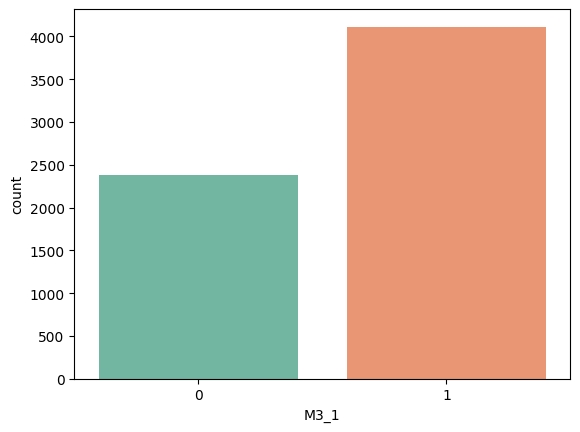

In [68]:
sns.countplot(x=df_m3['M3_1'], palette='Set2')

In [69]:
# selected
temp1 = df_m3[df_m3['M3_1']==1]
temp0 = df_m3[df_m3['M3_1']==0]

features = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
x_temp = temp1.loc[:, features].values 
y_temp = temp1.loc[:,['Mclass']].values

# split data
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_temp, y_temp, test_size = 0.30, 
                                                    random_state = 101)

model = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
# predict
predictM = model.predict(x_temp)

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [70]:
temp1['M3_2'] = predictM
temp0['M3_2'] = temp0['M3_1'] 


/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/216211861.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/216211861.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
temp0.shape, temp1.shape

((2384, 8), (4113, 8))

In [72]:
resultM3 = pd.concat([temp0,temp1])
resultM3.shape

(6497, 8)

In [73]:
resultM3['M3_2'].value_counts()

M3_2
1    2902
0    2384
2    1211
Name: count, dtype: int64

/var/folders/nd/yj1c8r3s3hbb1j1wl31nrldc0000gn/T/ipykernel_69287/3655974807.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='M3_2', ylabel='count'>

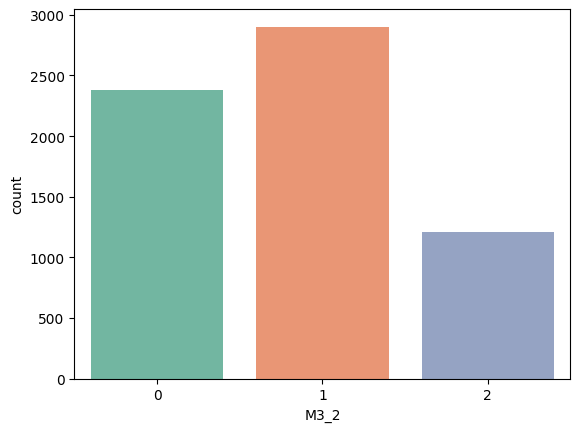

In [74]:
sns.countplot(x=resultM3['M3_2'], palette='Set2')

In [75]:
features = ['fixed acidity', 'volatile acidity', 'pH', 'alcohol']
x_resultM3 = resultM3.loc[:, features].values 
y_resultM3 = resultM3.loc[:,['M3_2']].values

forest_test(x_resultM3, y_resultM3)

/Users/ray0089/Documents/ai_wine_quality/.venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2.4319309999999987
[[546 164  12]
 [167 615  70]
 [ 18 106 252]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       722
           1       0.69      0.72      0.71       852
           2       0.75      0.67      0.71       376

    accuracy                           0.72      1950
   macro avg       0.73      0.72      0.72      1950
weighted avg       0.73      0.72      0.72      1950



# Report

In [76]:
pd.DataFrame(data = [['All features', 0.75, 0.71, 0.67, 3.69156, 0.72],
                     ['Logistic regression', 0.70, 0.65, 0.63, 2.5075, 0.67],
                     ['Poor&Normal Vs Excellent', 0.78, 0.71, 0.59, 2.3824, 0.71],
                     ['Poor&Excellent Vs Normal', 0.72, 0.66, 0.64, 2.4585, 0.68],
                     ['Normal&Excellent Vs Poor', 0.75, 0.71, 0.71, 2.4319, 0.72]],
             columns = ['Model',
                      '0: Excellent', 
                      '1: Normal',
                      '2: Poor',
                      'Time (Sec.)',
                      'Accuracy'])

,Model,0: Excellent,1: Normal,2: Poor,Time (Sec.),Accuracy
0,All features,0.75,0.71,0.67,3.69156,0.72
1,Logistic regression,0.70,0.65,0.63,2.50750,0.67
2,Poor&Normal Vs Excellent,0.78,0.71,0.59,2.38240,0.71
3,Poor&Excellent Vs Normal,0.72,0.66,0.64,2.45850,0.68
4,Normal&Excellent Vs Poor,0.75,0.71,0.71,2.43190,0.72
